In [ ]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode
from langchain_community.utilities import SQLDatabase

ModuleNotFoundError: No module named 'flask'

In [48]:
from langchain_community.utilities import SQLDatabase
import os

# Database credentials
db_user = "root"
db_password = ""
db_host = "127.0.0.1"  # Match Laravel's setup
db_name = "automobiz"

# Use pymysql instead of mysqlconnector
db_uri = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"

# Connect to the database
db = SQLDatabase.from_uri(db_uri)
print(db)

In [49]:
db.dialect

'mysql'

In [50]:
db.get_usable_table_names()

['autoservices',
 'autoservices_rating',
 'bookmark',
 'carmodeltable',
 'chat',
 'cities',
 'colortable',
 'comments',
 'comunity_userprofile',
 'dislikes',
 'failed_jobs',
 'follow',
 'forgetcode',
 'jobapply',
 'jobs',
 'likes',
 'make',
 'messages',
 'migrations',
 'model_has_permissions',
 'model_has_roles',
 'notifications',
 'parts_and_accessories',
 'partsrating',
 'password_resets',
 'permissions',
 'personal_access_tokens',
 'personalexperience',
 'personalinformation',
 'role_has_permissions',
 'roles',
 'saveautos',
 'servicescategory',
 'transmission',
 'userpost',
 'users',
 'vehicle_version',
 'vehicleengine',
 'vehicleinfo_bodytype',
 'vehiclerating',
 'vehicles',
 'view']

In [51]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-70b-8192",
             api_key="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" 
             )

In [52]:
llm.invoke("hello how are you?")

AIMessage(content="Hello! I'm just a language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 15, 'total_tokens': 63, 'completion_time': 0.137142857, 'prompt_time': 0.000182908, 'queue_time': 0.24709219999999998, 'total_time': 0.137325765}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run-84178f14-941d-47fe-a740-8d0f234e59b4-0', usage_metadata={'input_tokens': 15, 'output_tokens': 48, 'total_tokens': 63})

In [53]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [54]:
toolkit=SQLDatabaseToolkit(db=db, llm=llm)

In [55]:
tools=toolkit.get_tools()

In [56]:
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000013DB348DBD0>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000013DB348DBD0>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000013DB348DBD0>),
 QuerySQLCheckerTool(description='Use this tool to 

In [57]:
for tool in tools:
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [58]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)

In [59]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000013DB348DBD0>)

In [60]:
list_tables_tool.invoke("")

'autoservices, autoservices_rating, bookmark, carmodeltable, chat, cities, colortable, comments, comunity_userprofile, dislikes, failed_jobs, follow, forgetcode, jobapply, jobs, likes, make, messages, migrations, model_has_permissions, model_has_roles, notifications, parts_and_accessories, partsrating, password_resets, permissions, personal_access_tokens, personalexperience, personalinformation, role_has_permissions, roles, saveautos, servicescategory, transmission, userpost, users, vehicle_version, vehicleengine, vehicleinfo_bodytype, vehiclerating, vehicles, view'

In [61]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)

In [62]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000013DB348DBD0>)

In [63]:
print(get_schema_tool.invoke("vehicles"))


CREATE TABLE vehicles (
	id BIGINT(20) UNSIGNED NOT NULL AUTO_INCREMENT, 
	user_id BIGINT(20) UNSIGNED NOT NULL, 
	make VARCHAR(255) NOT NULL, 
	car_model VARCHAR(255) NOT NULL, 
	version VARCHAR(255) NOT NULL, 
	registration_date VARCHAR(255) NOT NULL, 
	category VARCHAR(255) NOT NULL, 
	body_type VARCHAR(255) NOT NULL, 
	seats VARCHAR(255) NOT NULL, 
	doors VARCHAR(255) NOT NULL, 
	exterior_color VARCHAR(255) NOT NULL, 
	fuel_type VARCHAR(255) NOT NULL, 
	engine_type VARCHAR(255) NOT NULL, 
	transmission VARCHAR(255) NOT NULL, 
	mileage VARCHAR(255) NOT NULL, 
	price INTEGER(255) NOT NULL, 
	description TEXT NOT NULL, 
	register_in VARCHAR(255) NOT NULL, 
	image TEXT NOT NULL, 
	location_city VARCHAR(255) NOT NULL, 
	location_sector VARCHAR(255) NOT NULL, 
	location_street VARCHAR(255) NOT NULL, 
	phone_no VARCHAR(255) NOT NULL, 
	secondary_phone VARCHAR(255), 
	email VARCHAR(255), 
	available_week_day VARCHAR(255), 
	available_timing VARCHAR(255), 
	status VARCHAR(255) NOT NULL DEF

In [64]:
llm_to_get_schema=llm.bind_tools([get_schema_tool])

In [65]:
from langchain_core.tools import tool
@tool
def query_to_database(query:str)->str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result=db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result

In [66]:
query_to_database.invoke("SELECT * FROM vehicles;")

'[(1, 5, \'Audi\', \'Civic\', \'1.6L Hybrid\', \'1/1/2014\', \'used\', \'Sedan\', \'4\', \'4\', \'White\', \'Petrol\', \'1200cc\', \'Automatic\', \'1200\', 14000, "Introducing the Audi A3 SALOON 35 TFSI Sport, the perfect combination of style and performance. This brilliant black beauty is a sleek, four-door marvel that\'s sure to turn heads on the road. But looks aren\'t everything with the A3 SALOON 35 TFSI Sport. On the inside, you\'ll find routine cloth...", \'new city\', \'173693533523.jpg,173693533542.jpg,173693533535.jpg,173693533560.jpg,17369353356.jpg,173693533538.jpg\', \'CR4G+86F, Stockport, UK\', \'19:01\', \'street 2\', \'(0161) 937 5971\', \'(0161) 937 5971\', \'jemycar@gmail.com\', \'Tuesday, Wednesday\', \'16:01\', \'panding\', None, datetime.datetime(2025, 1, 15, 20, 2, 15), datetime.datetime(2025, 1, 15, 20, 2, 15)), (2, 5, \'Toyota\', \'Yaris\', \'2.0L Turbo AWD\', \'1/1/2020\', \'used\', \'Sedan\', \'4\', \'4\', \'Crimson\', \'Gas\', \'1000cc\', \'Manual\', \'1200\'

In [67]:
llm_with_tools=llm.bind_tools([query_to_database])

In [69]:
llm_with_tools.invoke("SELECT * FROM vehicles;")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kn74', 'function': {'arguments': '{"query":"SELECT * FROM vehicles;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 947, 'total_tokens': 995, 'completion_time': 0.141115881, 'prompt_time': 0.038717823, 'queue_time': 0.24860690400000002, 'total_time': 0.179833704}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b918f43d-9a2f-4937-9421-9b7421ef9d15-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM vehicles;'}, 'id': 'call_kn74', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 48, 'total_tokens': 995})

In [70]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [71]:
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [72]:
list_tables=create_node_from_tool_with_fallback([list_tables_tool])
get_schema=create_node_from_tool_with_fallback([get_schema_tool])
query_database=create_node_from_tool_with_fallback([query_to_database])

In [73]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a SQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

check_generated_query = query_check_prompt | llm_with_tools

In [75]:
check_generated_query.invoke({"messages": [("user", "SELECT * FROM vehicles LIMIT 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0w4g', 'function': {'arguments': '{"query":"SELECT * FROM vehicles LIMIT 5;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 1051, 'total_tokens': 1102, 'completion_time': 0.145714286, 'prompt_time': 0.034249676, 'queue_time': 0.256830284, 'total_time': 0.179963962}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0785cbe1-c192-46a8-93ca-1cca1f3930a3-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM vehicles LIMIT 5;'}, 'id': 'call_0w4g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1051, 'output_tokens': 51, 'total_tokens': 1102})

In [76]:
check_generated_query.invoke({"messages": [("user", "SELECT +++ FROM vehicles LIMITs 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1de3', 'function': {'arguments': '{"query":"SELECT * FROM vehicles LIMIT 5"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 1052, 'total_tokens': 1102, 'completion_time': 0.142857143, 'prompt_time': 0.034334145, 'queue_time': 0.250210732, 'total_time': 0.177191288}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-29288bb7-397c-4015-9244-0586cf688013-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM vehicles LIMIT 5'}, 'id': 'call_1de3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1052, 'output_tokens': 50, 'total_tokens': 1102})

In [77]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")
    
llm_with_final_answer=llm.bind_tools([SubmitFinalAnswer])

In [78]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system_prompt = """You are a SQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

1. DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

When generating the query:

2. Output the SQL query that answers the input question without a tool call.

3. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

4. You can order the results by a relevant column to return the most interesting examples in the database.

5. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

6. If you get an error while executing a query, rewrite the query and try again.

7. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

8. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

9. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

10. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer. """

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system_prompt), ("placeholder", "{messages}")])

query_generator = query_gen_prompt | llm_with_final_answer

In [79]:
query_generator.invoke({"messages": [("can you fetch the data from vehicles table?")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_v0m9', 'function': {'arguments': '{"final_answer":"Here is the query to fetch data from the vehicles table: SELECT * FROM vehicles LIMIT 5"}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 1213, 'total_tokens': 1276, 'completion_time': 0.190747406, 'prompt_time': 0.039734524, 'queue_time': 0.24851280200000003, 'total_time': 0.23048193}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-91f87e40-c398-4784-ab0d-d47045f549cf-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'Here is the query to fetch data from the vehicles table: SELECT * FROM vehicles LIMIT 5'}, 'id': 'call_v0m9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1213, 'output_tokens': 63, 'total_tokens': 1276})

In [80]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    print(f"state from first_tool_call: {state}")
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [81]:
def check_the_given_query(state:State):
    print(f"state from check the given query: {state}")
    return {"messages": [check_generated_query.invoke({"messages": [state["messages"][-1]]})]}

In [82]:
def generation_query(state:State):
    message = query_generator.invoke(state)
    print(f"state from generation_query: {state}")

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [83]:
def should_continue(state:State):
    print(f"state from should_continue: {state}")
    messages = state["messages"]
    last_message = messages[-1]
    print("last message")
    print(last_message)
    if getattr(last_message, "tool_calls", None):
        print("sooo")
        return END
    elif last_message.content.startswith("Error:"):
        print("dooo")
        return "query_gen"
    else:
        print("oooo")
        return "correct_query"

In [84]:
def llm_get_schema(state:State):
    print("state from llm_get_schema", state)
    response = llm_to_get_schema.invoke(state["messages"])
    return {"messages": [response]}

In [88]:
workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", list_tables)
workflow.add_node("get_schema_tool", get_schema)
workflow.add_node("model_get_schema", llm_get_schema)
workflow.add_node("query_gen", generation_query)
workflow.add_node("correct_query", check_the_given_query)
workflow.add_node("execute_query", query_database)

In [89]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                            {END:END,
                            "correct_query":"correct_query"})
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [90]:
app=workflow.compile()

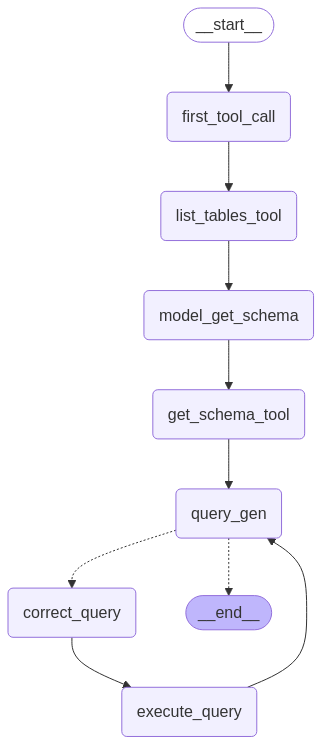

In [91]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [105]:
query={"messages": [("user", "how many red cars are there in the vehicles table ?")]}

In [106]:
response=app.invoke(query)

state from first_tool_call: {'messages': [HumanMessage(content='how many red cars are there in the vehicles table ?', additional_kwargs={}, response_metadata={}, id='ab82192e-ebfc-4f1b-9fde-b31f199135fe')]}
state from llm_get_schema {'messages': [HumanMessage(content='how many red cars are there in the vehicles table ?', additional_kwargs={}, response_metadata={}, id='ab82192e-ebfc-4f1b-9fde-b31f199135fe'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='28a19fdc-6c95-4d89-8ebc-161f876b85fb', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='autoservices, autoservices_rating, bookmark, carmodeltable, chat, cities, colortable, comments, comunity_userprofile, dislikes, failed_jobs, follow, forgetcode, jobapply, jobs, likes, make, messages, migrations, model_has_permissions, model_has_roles, notifications, parts_and_accessories, partsrating, password_resets, permissions, personal_access_tokens, p

In [107]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

"There are 3 vehicles in the vehicles table, and 2 of them have the exterior color 'Red'."

In [95]:
app.stream()

TypeError: Pregel.stream() missing 1 required positional argument: 'input'